In [ ]:
#Importar Librerías
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar path para importar desde src (subir un nivel desde notebooks/)
sys.path.append(os.path.abspath(os.path.join("..", "src")))
from data_loader import cargar_dataset

sns.set(style="darkgrid")

In [31]:
#Cargar dataset
ruta = "../data/dataset.csv"
df = cargar_dataset(ruta)

print("Tamaño del dataset:", df.shape)
df.head()

Tamaño del dataset: (3565, 3)


,title,abstract,group
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal
3,The interpeduncular nucleus regulates nicotine...,Partial lesions were made with kainic acid in ...,neurological
4,guillain-barre syndrome pathways in leukemia,Hypothesis: statins improves stroke outcomes v...,neurological


In [32]:
#Tamaño del dataset
print("Número de filas y columnas:", df.shape)

Número de filas y columnas: (3565, 3)


In [33]:
#Revisar valores Nulos
df.isnull().sum()

title       0
abstract    0
group       0
dtype: int64

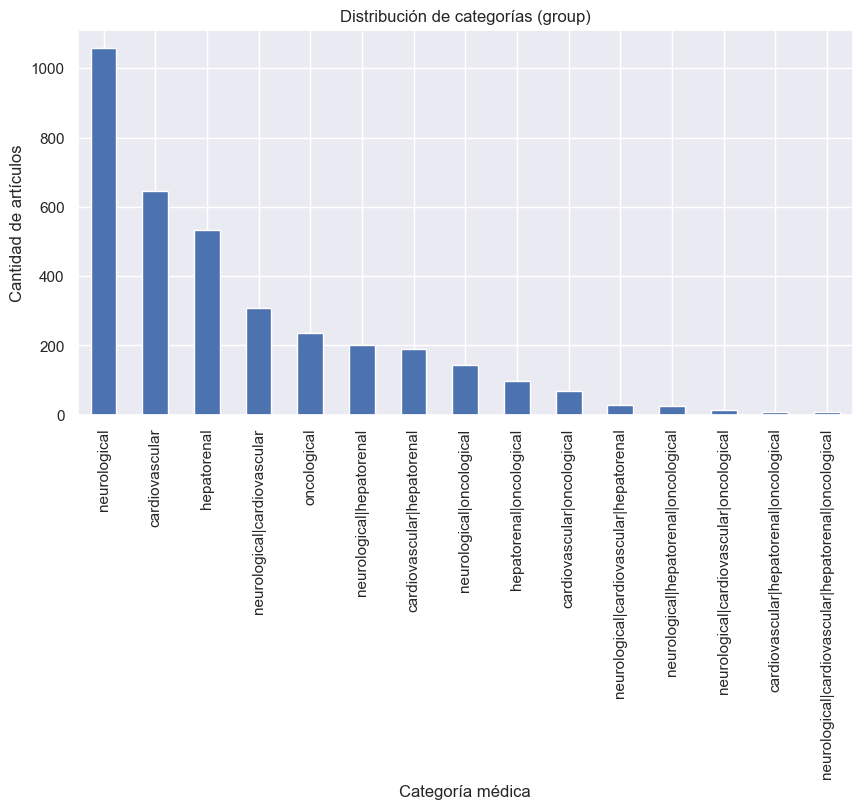

In [34]:
#Distribución de categorias
df['group'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribución de categorías (group)")
plt.xlabel("Categoría médica")
plt.ylabel("Cantidad de artículos")
plt.show()

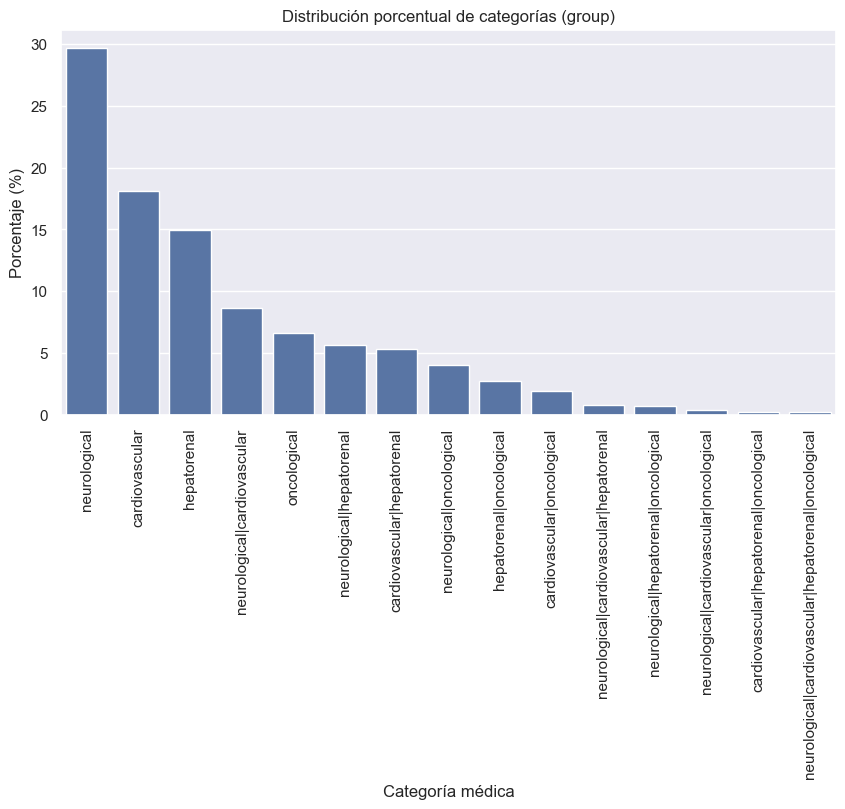

In [35]:
# Balance de clases en porcentaje
class_dist = df["group"].value_counts(normalize=True) * 100

plt.figure(figsize=(10,5))
sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title("Distribución porcentual de categorías (group)")
plt.xlabel("Categoría médica")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=90)
plt.show()


In [36]:
#Longitud de los textos
df["title_length"] = df["title"].str.split().apply(len)
df["abstract_length"] = df["abstract"].str.split().apply(len)

df[["title_length", "abstract_length"]].describe()

,title_length,abstract_length
count,3565.000000,3565.000000
mean,8.729032,100.056662
std,4.878152,93.066759
min,2.000000,22.000000
25%,5.000000,31.000000
50%,7.000000,37.000000
75%,11.000000,172.000000
max,38.000000,525.000000


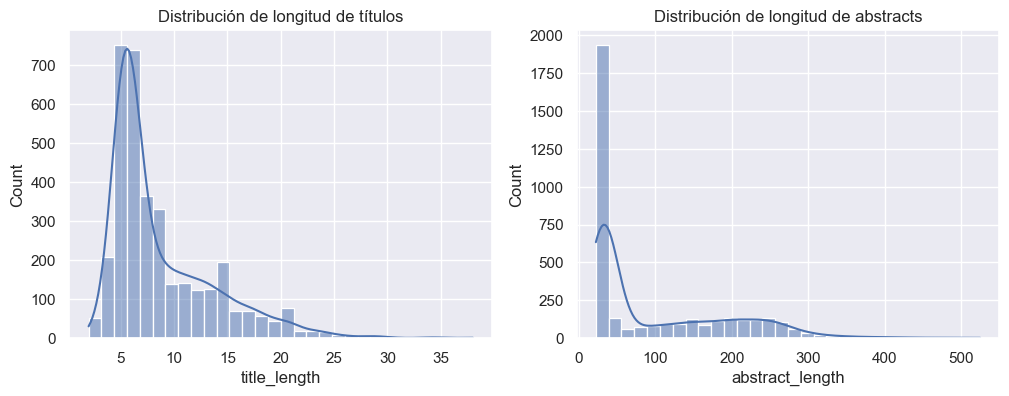

In [37]:
#Visualización de longitudes
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df["title_length"], bins=30, ax=axes[0], kde=True)
axes[0].set_title("Distribución de longitud de títulos")
sns.histplot(df["abstract_length"], bins=30, ax=axes[1], kde=True)
axes[1].set_title("Distribución de longitud de abstracts")
plt.show()


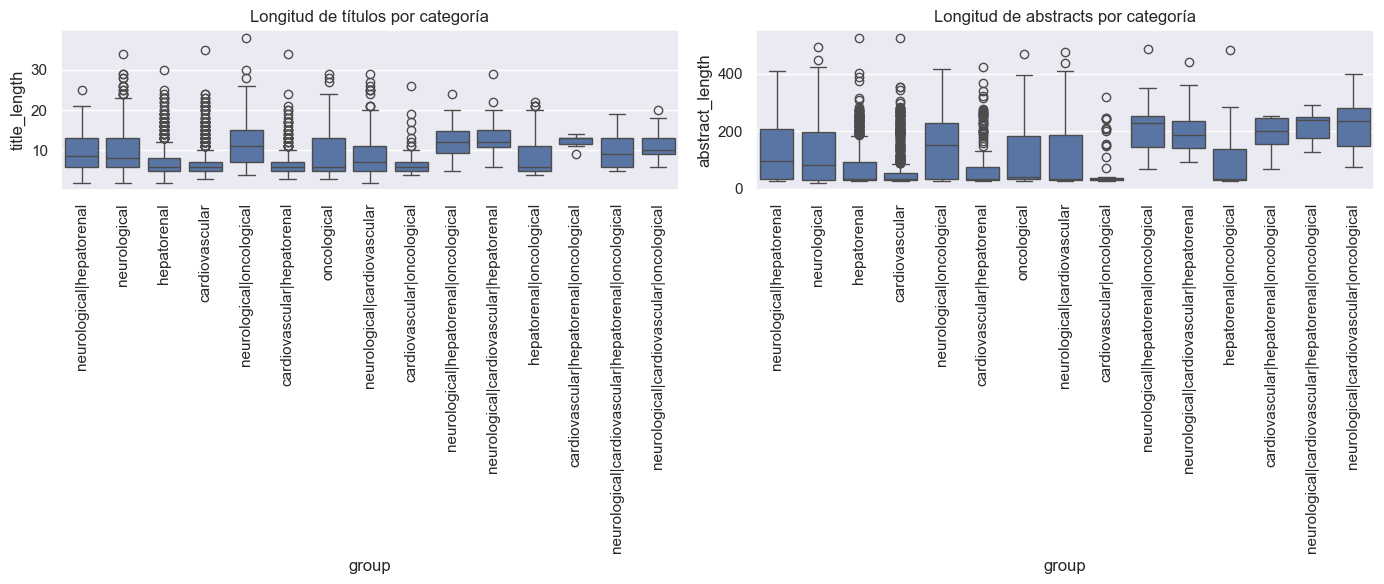

In [38]:
#Boxplots de longitudes por categoría
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(x="group", y="title_length", data=df, ax=axes[0])
axes[0].set_title("Longitud de títulos por categoría")
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(x="group", y="abstract_length", data=df, ax=axes[1])
axes[1].set_title("Longitud de abstracts por categoría")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


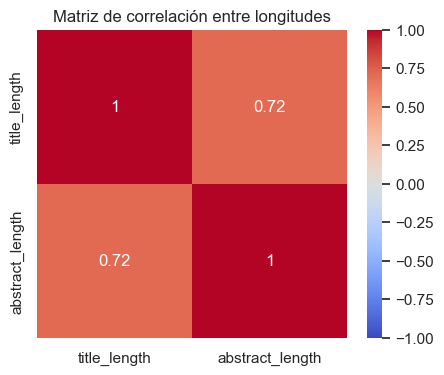

In [39]:
# Correlación entre longitudes
corr = df[["title_length", "abstract_length"]].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación entre longitudes")
plt.show()
